In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('telecom.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1952,0564-MUUQK,Female,0,Yes,Yes,20,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),95.50,1916.2,No
2853,0233-FTHAV,Female,0,No,No,60,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,One year,Yes,Bank transfer (automatic),79.20,4765,No
2520,5788-YPOEG,Female,0,Yes,Yes,34,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,84.75,2839.45,No
4373,7632-YUTXB,Female,0,Yes,Yes,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.05,520.1,No
4525,6578-KRMAW,Male,0,No,No,32,Yes,No,Fiber optic,Yes,...,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),93.40,2979.3,No


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.drop(columns=['customerID'],inplace=True)

In [11]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
#replacing ' ' empty values with nan
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

In [15]:
df.columns = df.columns.str.lower()

In [16]:
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [17]:
df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
df['churn'].value_counts()

churn
No     5174
Yes    1869
Name: count, dtype: int64

Data is highly imbalanced

In [19]:
100*df['churn'].value_counts()/len(df['churn'])

churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

74% of the Churn data is "No" and 26% is "Yes"

In [20]:
df.select_dtypes(include=['object']).shape

(7043, 16)

In [21]:
df.select_dtypes(include=['float64','int64']).shape

(7043, 4)

In [22]:
df.isnull().sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

11 null values in Total Charges

In [23]:
df.loc[df ['totalcharges'].isnull() == True]

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [24]:
#missing value ratio
(11/7044)*100

0.15616127200454286

In [25]:
#Removing missing values 
df.dropna(how = 'any', inplace = True)

In [26]:
#null value is dropped
df.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [27]:
# Check for any duplicated rows
print("\nNumber of duplicated rows before cleaning:", df.duplicated().sum())


Number of duplicated rows before cleaning: 22


In [28]:
# Remove duplicated rows
df = df.drop_duplicates()

In [29]:
# Check for any duplicated rows after cleaning
print("Number of duplicated rows after cleaning:", df.duplicated().sum())

Number of duplicated rows after cleaning: 0


<Axes: xlabel='totalcharges', ylabel='Count'>

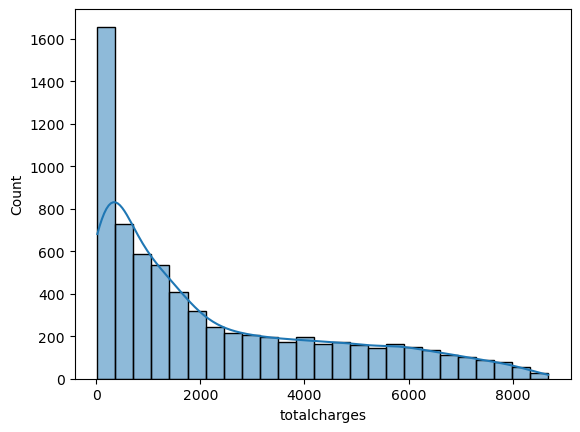

In [30]:
sns.histplot(df['totalcharges'],kde=True)


<Axes: >

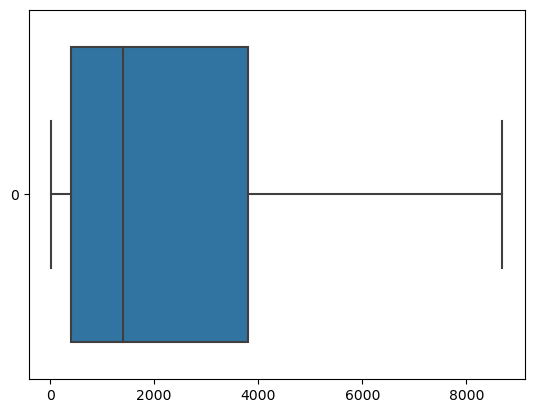

In [31]:
sns.boxplot(df['totalcharges'],orient='h')

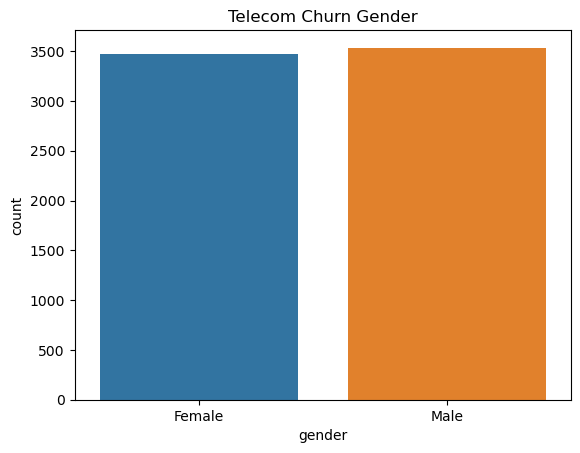

In [32]:
sns.countplot(x = df['gender'])
plt.title('Telecom Churn Gender')
plt.show()

<Axes: xlabel='monthlycharges', ylabel='totalcharges'>

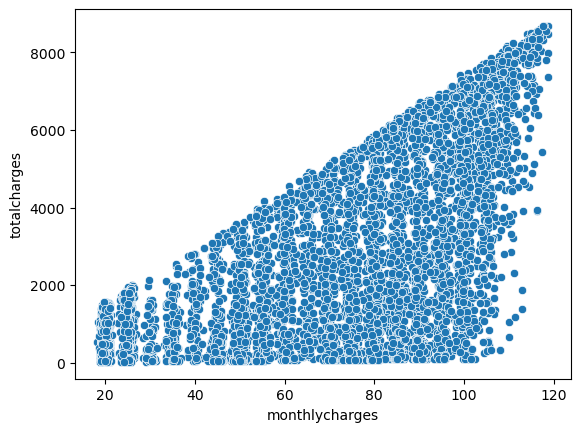

In [33]:
#birate analysis
sns.scatterplot(x='monthlycharges', y='totalcharges',data=df)

In [34]:
#selecting only categorical column
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'churn'],
      dtype='object')

In [35]:
#dropping out target column from categorical
cat_cols = cat_cols.drop('churn')

In [36]:
cat_cols

Index(['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod'],
      dtype='object')

<Axes: xlabel='monthlycharges', ylabel='Count'>

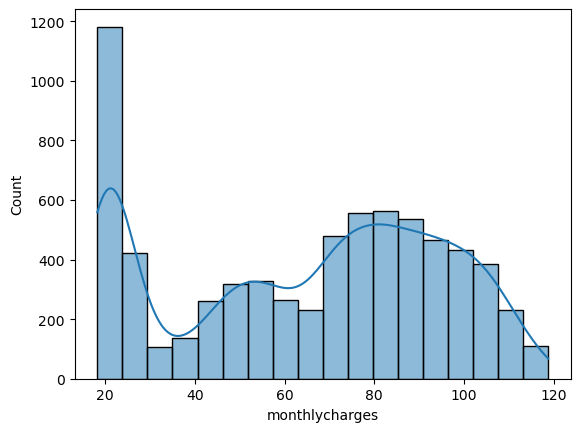

In [37]:
sns.histplot(df['monthlycharges'],kde=True)

<Axes: xlabel='tenure', ylabel='Count'>

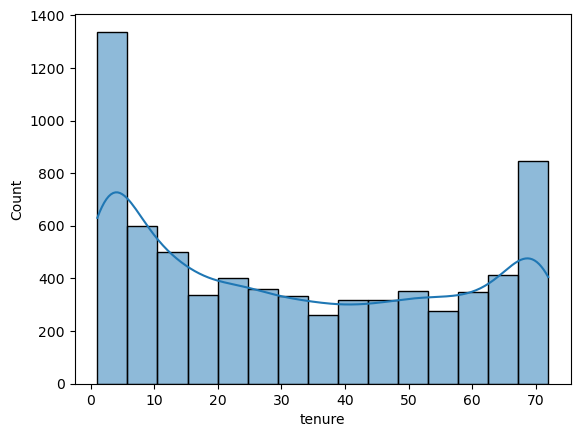

In [38]:
sns.histplot(df['tenure'],kde=True)


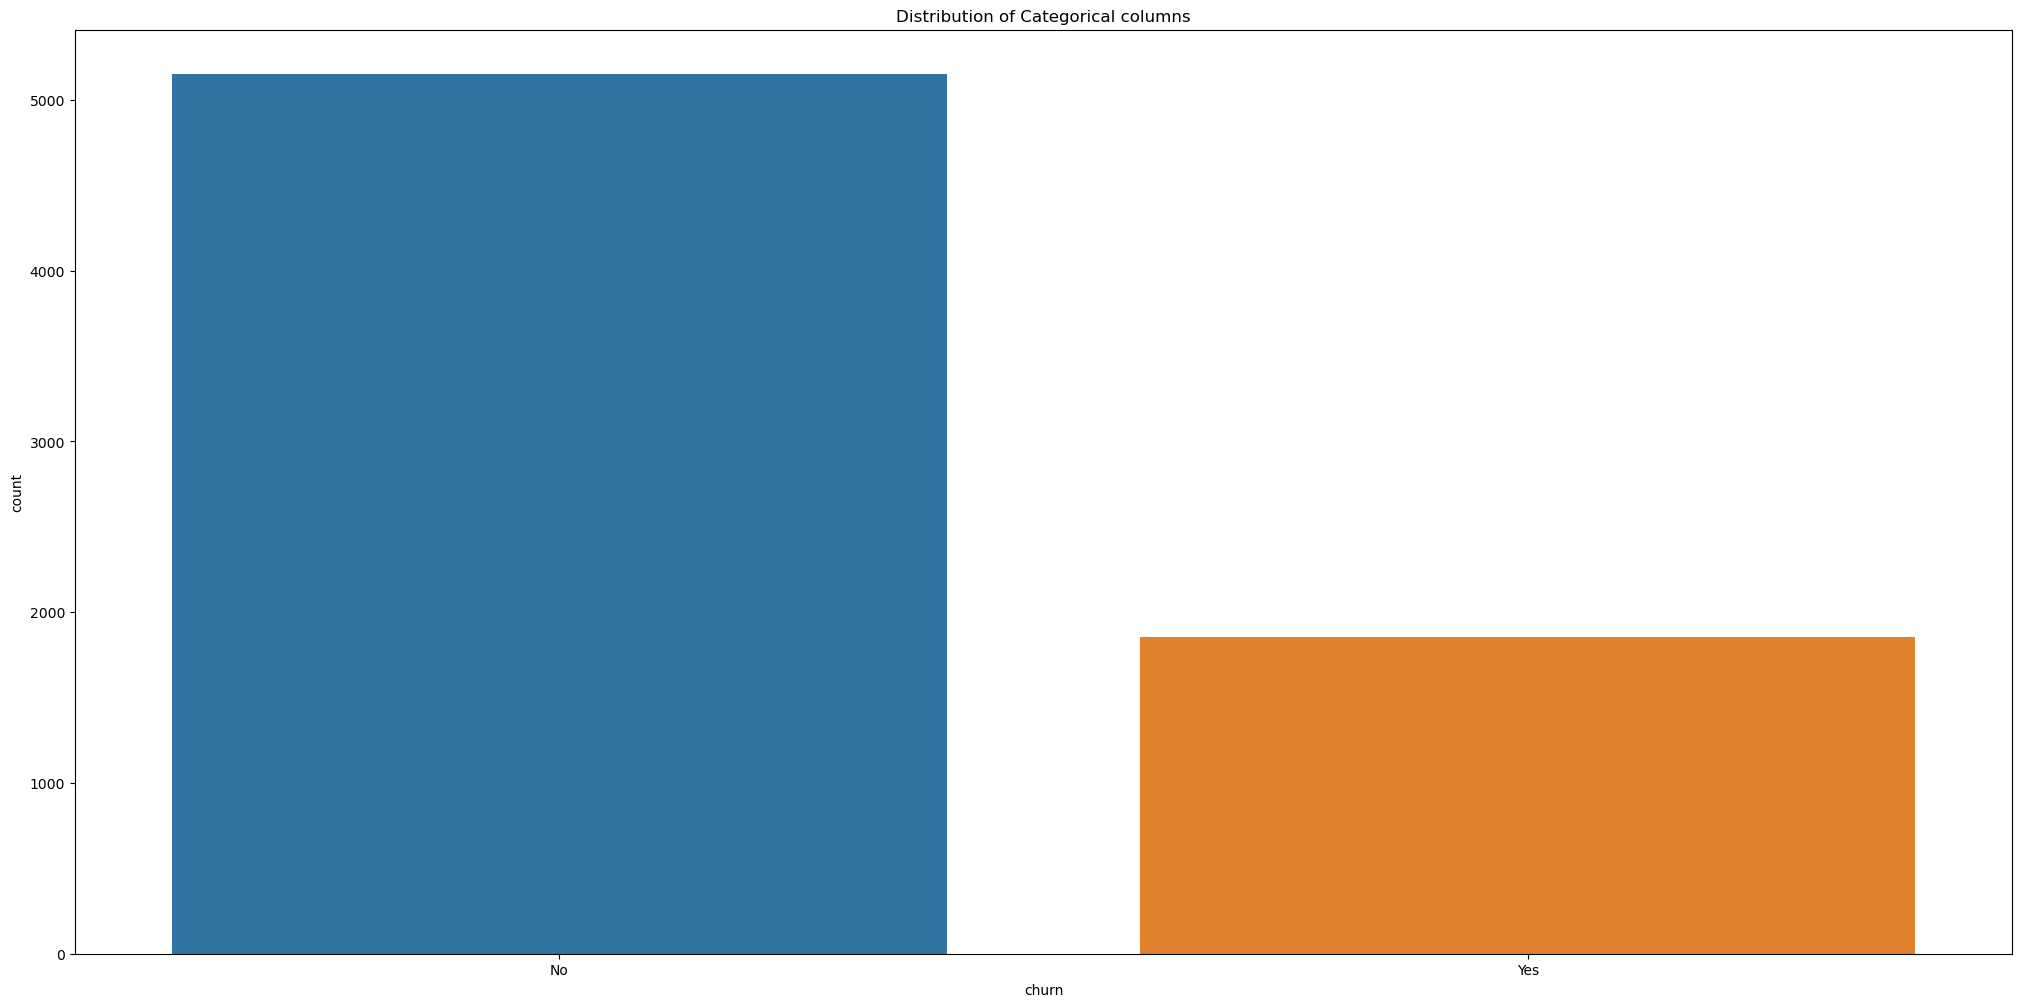

In [39]:
# Plot count plots for categorical columns
plt.figure(figsize=(25, 12))
sns.countplot(x='churn', data=df)
plt.title('Distribution of Categorical columns')
plt.show()

In [40]:
df_updated = df.copy()

In [41]:
# Assuming 'Yes' is encoded as 1 and 'No' as 0 (instead of Hot-coding)
df_updated['gender'] = df_updated['gender'].replace({'Female': 0,'Male': 1})
df_updated['partner'] = df_updated['partner'].replace({'Yes': 1, 'No': 0})
df_updated['dependents'] = df_updated['dependents'].replace({'Yes': 1, 'No': 0})
df_updated['multiplelines'] = df_updated['multiplelines'].replace({'Yes': 1, 'No': 0, 'No phone service':2})
df_updated['internetservice'] = df_updated['internetservice'].replace({'DSL': 1, 'Fiber optic': 2,'No':0})
df_updated['onlinesecurity'] = df_updated['onlinesecurity'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
df_updated['onlinebackup'] = df_updated['onlinebackup'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
df_updated['deviceprotection'] = df_updated['deviceprotection'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
df_updated['techsupport'] = df_updated['techsupport'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
df_updated['streamingtv'] = df_updated['streamingtv'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
df_updated['streamingmovies'] = df_updated['streamingmovies'].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
df_updated['contract'] = df_updated['contract'].replace({'Month-to-month': 1, 'One year': 0, 'Two year': 0})
df_updated['paperlessbilling'] = df_updated['paperlessbilling'].replace({'Yes': 1, 'No': 0})
df_updated['paymentmethod'] = df_updated['paymentmethod'].replace({'Electronic check': 1, 'Mailed check': 0, 'Bank transfer (automatic)':2,'Credit card (automatic)':3})
df_updated['churn'] = df_updated['churn'].replace({'Yes': 1, 'No': 0})


In [42]:
df_updated.sample(10)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
4728,1,0,0,0,46,No,2,1,1,0,1,1,0,0,0,0,0,38.25,1755.35,0
987,1,0,0,0,1,Yes,0,0,0,0,0,0,0,0,1,0,2,19.75,19.75,0
5049,0,0,0,0,1,Yes,0,0,0,0,0,0,0,0,1,1,2,20.20,20.20,1
6462,1,0,0,0,2,Yes,0,2,0,1,0,0,1,1,1,0,1,95.65,167.30,1
1948,0,0,0,0,2,Yes,0,2,0,0,0,0,0,1,1,0,1,80.75,159.45,1
3903,1,0,0,0,53,Yes,0,2,0,1,0,1,0,0,1,1,0,80.60,4348.10,0
1426,1,1,1,0,71,Yes,1,2,1,1,1,1,0,0,0,1,1,92.00,6585.20,0
2012,0,0,1,0,47,Yes,1,2,1,1,1,0,1,0,1,1,1,98.75,4533.70,1
6108,1,0,0,0,18,No,2,1,0,0,0,0,0,0,1,0,0,25.15,476.80,0
2318,0,0,1,1,71,Yes,1,2,1,1,1,0,1,0,0,0,2,100.50,7030.65,0


In [43]:
df.tenure.describe()

count    7010.000000
mean       32.520399
std        24.520441
min         1.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

In [44]:
df.select_dtypes(include=['object']).columns

Index(['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'churn'],
      dtype='object')

In [45]:
df.churn.unique()

array(['No', 'Yes'], dtype=object)

In [47]:
# Calculate correlation matrix
correlation_matrix = df_updated[['phoneservice', 'multiplelines', 'internetservice', 'churn']].corr()

ValueError: could not convert string to float: 'No'

In [48]:
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of PhoneService, MultipleLines, InternetService, and Churn')
plt.show()


NameError: name 'correlation_matrix' is not defined

<Figure size 1000x800 with 0 Axes>

In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64','int32']).columns
for column in num_cols:
    unique_values = df[column].unique()
    print(f"Column '{column}': {unique_values}")

# Normalization

In [ ]:
# Create a scaler object
scaler = MinMaxScaler()

In [ ]:
df[num_cols]

In [ ]:
df_normalized = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)
df_normalized

In [ ]:
df